<a href="https://colab.research.google.com/github/KumuthuA/ml-project/blob/main/layer_12_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier

In [ ]:
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/ML project/Layer 12"
train = pd.read_csv(f"{WORKING_DIR}/layer_12_train.csv")
valid = pd.read_csv(f"{WORKING_DIR}/layer_12_valid.csv")
test = pd.read_csv(f"{WORKING_DIR}/layer_12_test.csv")

Mounted at /content/drive


In [ ]:
global labels
global features
labels = [f"label_{i+1}" for i in range(4)]
features = [f'feature_{i+1}' for i in range(768)]
label_1 = labels[0]
label_2 = labels[1]
label_3 = labels[2]
label_4 = labels[3]

# Defining functions

In [ ]:
def data_preprocess(train_df, valid_df, test_df, label):
    scaler = StandardScaler()

    X_train = pd.DataFrame(scaler.fit_transform(train_df.drop(labels, axis=1)), columns=features)
    y_train = train_df[label]

    X_valid = pd.DataFrame(scaler.transform(valid_df.drop(labels, axis=1)), columns=features)
    y_valid = valid_df[label]

    X_test = pd.DataFrame(scaler.transform(test_df.drop("ID", axis=1)), columns=features)
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
def feature_engineering_with_pca(X_train, X_valid, X_test, n_components):

    pca = PCA(n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_train_df_pca = pd.DataFrame(X_train_pca)
    X_valid_df_pca = pd.DataFrame(pca.transform(X_valid))
    X_test_df_pca = pd.DataFrame(pca.transform(X_test))
    print("Shape for label1 train set:", X_train_df_pca.shape)
    print("Shape for label1 validation set:", X_valid_df_pca.shape)
    print("Shape for label1 validation set:", X_test_df_pca.shape)

    return X_train_df_pca, X_valid_df_pca, X_test_df_pca

In [ ]:
def feature_engineering_with_select_kbest(X_train, y_train, X_valid, X_test, n):
    selector = SelectKBest(f_classif, k=n)
    X_train_df = selector.fit_transform(X_train, y_train)
    X_valid_df = selector.transform(X_valid)
    X_test_df = selector.transform(X_test)
    print("Shape for label1 train set:", X_train_df.shape)
    print("Shape for label1 validation set:", X_valid_df.shape)
    print("Shape for label1 validation set:", X_test_df.shape)
    return X_train_df, X_valid_df, X_test_df

In [ ]:
def build_svc_model(X_train, y_train):
    svc_model = SVC(kernel='linear', gamma='scale')
    svc_model.fit(X_train, y_train)
    return svc_model

In [ ]:
def evaluate(y_valid, y_pred):
    print(f"Accuracy: {accuracy_score(y_valid, y_pred)}")
    print(f"F1 Score: {f1_score(y_valid, y_pred, average='weighted')}")
    print(f"Precision: {precision_score(y_valid, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_valid, y_pred, average='weighted')}")

# Data preprocessing

In [ ]:
X_train_1, y_train_1, X_valid_1, y_valid_1, X_test_1, y_test_1 = data_preprocess(train, valid, test, label_1)

y_train_1.info()
X_train_1.head()

<class 'pandas.core.series.Series'>
RangeIndex: 28520 entries, 0 to 28519
Series name: label_1
Non-Null Count  Dtype
--------------  -----
28520 non-null  int64
dtypes: int64(1)
memory usage: 222.9 KB


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.329951,-0.874942,0.945030,-1.450210,-1.109347,0.273620,0.460258,0.583743,-0.377183,-0.230822,...,-0.229699,0.384775,-0.463634,-0.518098,-1.785764,0.032542,0.585140,0.222540,-0.481246,1.138824
1,-0.290159,-0.511910,0.311220,-1.531774,-1.454297,0.746810,-0.087765,0.096317,-1.972106,1.899664,...,-1.313087,1.061543,-1.005278,-1.694065,-0.260816,-1.044074,0.826399,1.333254,-1.480179,1.448368
2,1.367056,0.541585,-1.072471,0.277606,-0.574033,-0.339486,-0.605557,-0.615740,-1.175479,0.662531,...,-1.188580,1.232482,-0.716324,-1.824596,-1.126878,0.776746,0.527946,0.453604,0.127652,0.941952
3,-0.202730,-0.506566,-0.900401,-0.552425,0.990384,2.437392,-0.139796,0.286056,1.232407,0.048388,...,-0.459924,0.527341,0.507150,-0.508209,0.775750,-1.676030,1.312073,0.725941,-1.295187,1.257161
4,-1.056595,0.430624,0.360219,-1.746826,-1.039992,0.495781,-1.020972,0.506187,-1.661261,0.456327,...,-1.000751,0.911061,-1.133213,-1.206151,-1.713265,0.786038,0.743955,1.255590,-1.369537,0.876976


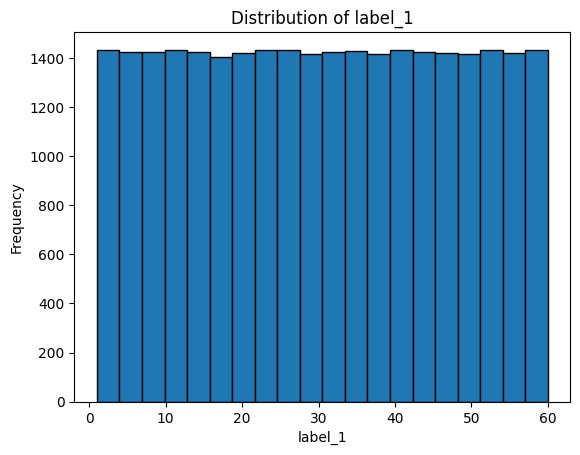

In [ ]:
plt.hist(y_train_1, bins=20, edgecolor='k')
plt.xlabel(label_1)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_1}')
plt.show()

# Cross validation - Lable 01

In [ ]:
svc_model = SVC()
knn_model = KNeighborsClassifier(n_neighbors=5)
xgb_model = xgb.XGBClassifier()


num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

svc_scores = cross_val_score(svc_model, X_train_1, y_train_1, cv=kfold)
print("SVC Cross-Validation Scores:")
for i, score in enumerate(svc_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
svc_mean_accuracy = svc_scores.mean()
print(f"Mean Accuracy (SVC): {svc_mean_accuracy:.2f}")

knn_scores = cross_val_score(knn_model, X_train_1, y_train_1, cv=kfold)
print("\nKNN Cross-Validation Scores:")
for i, score in enumerate(knn_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
knn_mean_accuracy = knn_scores.mean()
print(f"Mean Accuracy (KNN): {knn_mean_accuracy:.2f}")

SVC Cross-Validation Scores:
Fold 1 - Accuracy: 0.84
Fold 2 - Accuracy: 0.84
Fold 3 - Accuracy: 0.85
Fold 4 - Accuracy: 0.84
Fold 5 - Accuracy: 0.84
Mean Accuracy (SVC): 0.84

KNN Cross-Validation Scores:
Fold 1 - Accuracy: 0.65
Fold 2 - Accuracy: 0.66
Fold 3 - Accuracy: 0.66
Fold 4 - Accuracy: 0.66
Fold 5 - Accuracy: 0.65
Mean Accuracy (KNN): 0.66


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train_1, y_train_1, cv=kfold)
print("Random Forest Cross-Validation Scores:")
for i, score in enumerate(rf_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
rf_mean_accuracy = rf_scores.mean()
print(f"Mean Accuracy (Random Forest): {rf_mean_accuracy:.2f}")

Random Forest Cross-Validation Scores:
Fold 1 - Accuracy: 0.65
Fold 2 - Accuracy: 0.65
Fold 3 - Accuracy: 0.65
Fold 4 - Accuracy: 0.64
Fold 5 - Accuracy: 0.65
Mean Accuracy (Random Forest): 0.65


SVM

In [ ]:
model_1_svc_before = build_svc_model(X_train_1, y_train_1)

y_pred_1_svc_before = model_1_svc_before.predict(X_valid_1)

evaluate(y_valid_1, y_pred_1_svc_before)

Accuracy: 0.8786666666666667
F1 Score: 0.879863038667138
Precision: 0.8873460760372525
Recall: 0.8786666666666667
Accuracy: 0.9093333333333333
F1 Score: 0.9090911993120866
Precision: 0.9128135246991285
Recall: 0.9093333333333333


# Feature reduction using PCA

In [ ]:
X_train_1_pca, X_valid_1_pca, X_test_1_pca = feature_engineering_with_pca(X_train_1, X_valid_1, X_test_1, n_components=0.95)

Shape for label1 train set: (28520, 112)
Shape for label1 validation set: (750, 112)
Shape for label1 validation set: (750, 112)


In [ ]:
model_1_pca_svc = build_svc_model(X_train_1_pca, y_train_1)

y_pred_1_svc = model_1_pca_svc.predict(X_valid_1_pca)

print(confusion_matrix(y_valid_1, y_pred_1_svc))
evaluate(y_valid_1, y_pred_1_svc)

[[10  0  0 ...  0  0  0]
 [ 0  5  1 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  1]
 [ 0  0  0 ...  0  8  0]
 [ 1  0  0 ...  0  0  6]]
Accuracy: 0.776
F1 Score: 0.7779581353339394
Precision: 0.7959751779008745
Recall: 0.776


# Hyperparameter Tuning

In [ ]:
param_grid_1 = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

model_1_svc = SVC()

grid_search_1 = GridSearchCV(estimator=model_1_svc, param_grid=param_grid_1, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')

grid_search_1.fit(X_train_1_pca, y_train_1)

best_params_1 = grid_search_1.best_params_
best_model_1 = grid_search_1.best_estimator_

valid_accuracy_1 = best_model_1.score(X_valid_1_pca, y_valid_1)

print("Best Hyperparameters:", best_params_1)
print("Test Accuracy:", valid_accuracy_1)
#Best Hyperparameters: {'C': 100, 'kernel': 'rbf'}
#Test Accuracy: 0.9813333333333333

# Predicting label 1

In [ ]:
model_1_pca_svc_2 = SVC(C= 100, kernel='rbf', class_weight="balanced")
model_1_pca_svc_2.fit(X_train_1_pca, y_train_1)
y_pred_1_svc_2 = model_1_pca_svc_2.predict(X_valid_1_pca)

print(confusion_matrix(y_valid_1, y_pred_1_svc_2))
evaluate(y_valid_1, y_pred_1_svc_2)

In [ ]:
y_pred_1 = model_1_pca_svc_2.predict(X_test_1_pca)
output_df_1 = pd.DataFrame({'ID': range(1, len(y_pred_1) + 1), 'label_1': y_pred_1})

output_file_path_1 = f"{WORKING_DIR}/layer_12_1_out_svc_final_today.csv"
output_df_1.to_csv(output_file_path_1, index=False)
print(f'Predictions saved to {output_file_path_1}')

Accuracy: 0.8706666666666667
F1 Score: 0.8713886758493926
Precision: 0.8830024168641816
Recall: 0.8706666666666667
Predictions saved to /content/drive/MyDrive/ML/ML project/Layer 12/layer_12_1_out_svc_final_today.csv
